In [1]:
import os
import pandas as pd
import qiime2 as q2
from skbio import OrdinationResults
from qiime2 import Visualization
from seaborn import scatterplot
import matplotlib.pyplot as plt
%matplotlib inline

## Comments on results
* The weighted unifrac plot, the 1st three components explain the most variance compared to unweighted unifrac and bray curtis
* Using unweighted unifrac, diet milk, all groups, including NaN, are significantly different. 
* Using weighted unifrac, diet weaning, all groups, including NaN, are significantly different.

In [2]:
data_dir = 'data'
or_dir = '../data'

In [13]:
Visualization.load(f'{data_dir}/core-metrics-results/weighted_unifrac_emperor.qzv')

<visualization: Visualization uuid: d2965c85-0662-463a-bf84-2fed7b60549c>

In [3]:
Visualization.load(f'{data_dir}/core-metrics-results/unweighted_unifrac_emperor.qzv')

<visualization: Visualization uuid: a4e922ab-e566-4dff-8ce0-553b06dd5557>

In [4]:
Visualization.load(f'{data_dir}/core-metrics-results/bray_curtis_emperor.qzv')

<visualization: Visualization uuid: 1a068e30-182e-4444-aad5-380695eb6693>

## Diet milk statistical comparison

In [8]:
metadata = pd.read_csv(or_dir+'/metadata.tsv', sep = '\t')
metadata['diet_milk'] = metadata['diet_milk'].fillna('weaned')
metadata['diet_weaning'] = metadata['diet_weaning'].fillna('weaned')
metadata.to_csv(data_dir + '/metadata_nan_weaned.tsv', sep = '\t', index = False)

In [6]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir/core-metrics-results/weighted_unifrac_distance_matrix.qza \
    --m-metadata-file $data_dir/metadata_nan_weaned.tsv \
    --m-metadata-column diet_milk \
    --p-pairwise \
    --o-visualization $data_dir/core-metrics-results/w_unifrac-diet_milk-significance.qzv

Saved Visualization to: data/core-metrics-results/w_unifrac-diet_milk-significance.qzv


In [4]:
Visualization.load(f'{data_dir}/core-metrics-results/w_unifrac-diet_milk-significance.qzv')

<visualization: Visualization uuid: 239f0619-9011-4af1-929b-8e62912992c5>

## Diet weaning statistical comparison

In [15]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir/core-metrics-results/weighted_unifrac_distance_matrix.qza \
    --m-metadata-file $data_dir/metadata_nan_weaned.tsv \
    --m-metadata-column diet_weaning \
    --p-pairwise \
    --o-visualization $data_dir/core-metrics-results/w_unifrac-diet_weaning-significance.qzv

Saved Visualization to: data/core-metrics-results/w_unifrac-diet_weaning-significance.qzv


In [3]:
Visualization.load(f'{data_dir}/core-metrics-results/w_unifrac-diet_weaning-significance.qzv')

<visualization: Visualization uuid: 10c66a5e-71c0-4b41-af6d-9863a13b451d>

## Plotting the distances to see if cluster according to diet groups

In [13]:
def plot_beta_diversity_cluster(metric_file_string, diet_string):
    pcs = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/'+metric_file_string))
    pcs = pcs.view(OrdinationResults)
    # let's just take the first 3 columns (i.e., first 3 PCoA axes)
    pcs_data = pcs.samples.iloc[:,:3]
    # rename the columns for clarity
    pcs_data.columns = ['Axis 1', 'Axis 2', 'Axis 3']

    #print(metadata.columns)
    inter = metadata[['id',diet_string]]
    inter = inter.set_index('id')
    pcs_data_with_md = pcs_data.join(inter)
    #print(pcs_data_with_md.head())
    
    plt.figure()
    scatterplot(data=pcs_data_with_md,
                x='Axis 1',
                y='Axis 2',
                hue=diet_string)#,
                #palette='viridis')

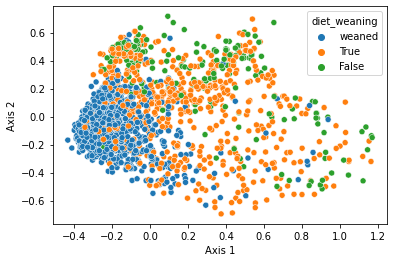

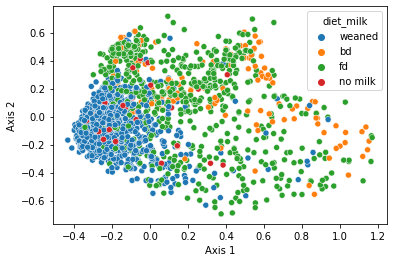

In [14]:
## weighted unifrac
plot_beta_diversity_cluster('weighted_unifrac_pcoa_results.qza', 'diet_weaning')
plot_beta_diversity_cluster('weighted_unifrac_pcoa_results.qza', 'diet_milk')

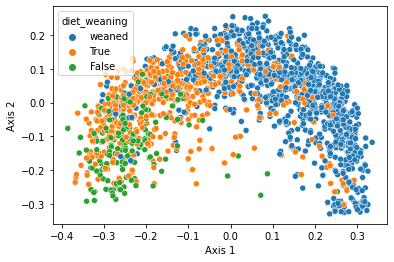

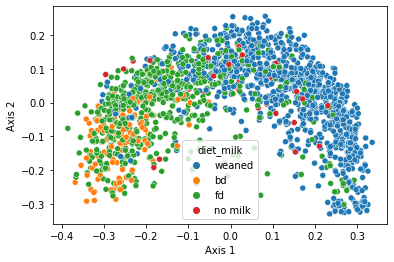

In [15]:
## unweighted unifrac
plot_beta_diversity_cluster('unweighted_unifrac_pcoa_results.qza', 'diet_weaning')
plot_beta_diversity_cluster('unweighted_unifrac_pcoa_results.qza', 'diet_milk')

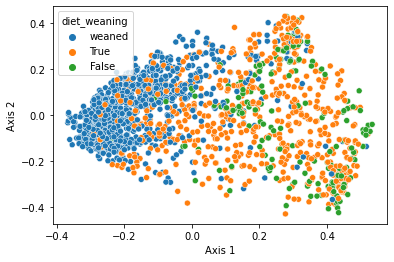

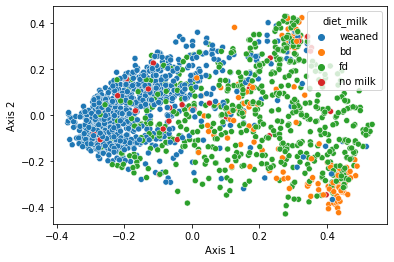

In [16]:
## unweighted unifrac
plot_beta_diversity_cluster('bray_curtis_pcoa_results.qza', 'diet_weaning')
plot_beta_diversity_cluster('bray_curtis_pcoa_results.qza', 'diet_milk')

In [31]:
pcs.samples.iloc[1:3,1:6]

,1,2,3,4,5
ERR1309716,0.095293,-0.113925,0.072830,-0.152981,0.060622
ERR1309717,0.051842,-0.051021,0.125076,-0.177138,0.068113
